<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_graph_napoleon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>

# Adat megjelenítése Python programmal


## matplotlib és networkx használata

<https://klajosw.blogspot.com/>


### Napoleon orosz hadjárat elemzés /  Napoleon Russian Campaign analyst
- Napoleon (Fő)  serege
- Jérôme herceg  serege
- Davout marsall serege


---

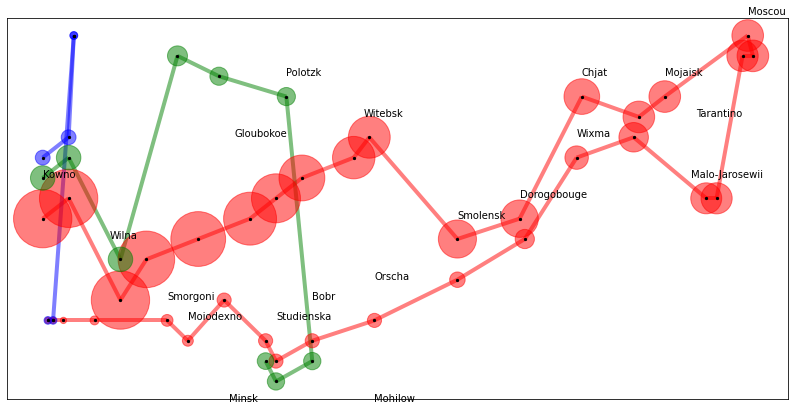

In [ ]:
## Python modulok betöltése / Import Python Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx


def minard_graph():
    
## forras adatok / Source data    
##-----------------    Napoleon serege és csatái
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
##-----------------    Jérôme herceg serege és csatái
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
##------------------ Davout marsall serege és csatái
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    
## ---------------- városok    
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""
    
## ---------------------- Hőmérséklet
    teperatures    ='''\    
37.6    0    6  Oct 18  
36.0    0    6  Oct 24
33.2   -9   16  Nov 9
32.0  -21    5  Nov 14
29.2  -11   10          
28.5  -20    4  Nov 28
27.2  -24    3  Dec 1
26.7  -30    5  Dec 6
25.3  -26    1  Dec 7'''    
    
## Hőmérséklet betöltés / Teperatures loading
    c = {}
    for line in cities.split('\n'):
        x, y, name = line.split(',')
        c[name] = (float(x), float(y))    
    
## Városok betöltése / Cities load
    c = {}
    for line in cities.split('\n'):
        x, y, name = line.split(',')
        c[name] = (float(x), float(y))
        
## Csaták helye és létszám betöltése / Location pos and size loading
    g = []
    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # helyszinek / location
        G.pop = {}  # létszámok  / size
        last = None
        for line in data.split('\n'):
            x, y, p, r, n = line.split(',')
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


### Fő program folyamat / Main program session
if 1 == 1 :
    
    (g, city) = minard_graph()

    plt.figure(1, figsize=(14, 7))
    plt.clf()
    colors = ['r', 'g', 'b']
    for G in g:
        c = colors.pop(0)
        node_size = [int(G.pop[n] / 100.0) for n in G]                                  ## kör méretezés
        nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)              ## él rajzolás
        nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)  ## kör nagysága
        nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color='k')                   ## kör középpont

    for c in city:
        x, y = city[c]
        plt.text(x, y + 0.1, c)                                                         ## városok
    plt.show()
    
## vége / end


---

# WIKI forrás kép

<p align="left"> 
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png" 
         align="left" width="600" height="480">
    
</p>

---

---

## Források felhasználása


### Adatok forrása:
Minard's data from Napoleon's 1812-1813 Russian Campaign. 

http://www.math.yorku.ca/SCS/Gallery/minard/minard.txt 
https://www.cs.uic.edu/~wilkinson/TheGrammarOfGraphics/minard.txt

https://en.wikipedia.org/wiki/File:Minard.png

---

In [ ]:
lonc latc city2 lont temp days  date2   lonp  latp  surviv  direc2 division
24.0 55.0 Kowno          37.6    0    6  Oct 18  24.0  54.9  340000  A  1
25.3 54.7 Wilna          36.0    0    6  Oct 24  24.5  55.0  340000  A  1
26.4 54.4 Smorgoni       33.2   -9   16  Nov 9   25.5  54.5  340000  A  1
26.8 54.3 Molodexno      32.0  -21    5  Nov 14  26.0  54.7  320000  A  1
27.7 55.2 Gloubokoe      29.2  -11   10          27.0  54.8  300000  A  1
27.6 53.9 Minsk          28.5  -20    4  Nov 28  28.0  54.9  280000  A  1
28.5 54.3 Studienska     27.2  -24    3  Dec 1   28.5  55.0  240000  A  1
28.7 55.5 Polotzk        26.7  -30    5  Dec 6   29.0  55.1  210000  A  1
29.2 54.4 Bobr           25.3  -26    1  Dec 7   30.0  55.2  180000  A  1
30.2 55.3 Witebsk                                30.3  55.3  175000  A  1
30.4 54.5 Orscha                                 32.0  54.8  145000  A  1
30.4 53.9 Mohilow                                33.2  54.9  140000  A  1
32.0 54.8 Smolensk                               34.4  55.5  127100  A  1
33.2 54.9 Dorogobouge                            35.5  55.4  100000  A  1
34.3 55.2 Wixma                                  36.0  55.5  100000  A  1
34.4 55.5 Chjat                                  37.6  55.8  100000  R  1
36.0 55.5 Mojaisk                                37.5  55.7   98000  R  1
37.6 55.8 Moscou                                 37.0  55.0   97000  R  1
36.6 55.3 Tarantino                              36.8  55.0   96000  R  1
36.5 55.0 Malo-jarosewli                         35.4  55.3   87000  R  1
                                                 34.3  55.2   55000  R  1
                                                 33.3  54.8   37000  R  1
                                                 32.0  54.6   24000  R  1
                                                 30.4  54.4   20000  R  1
                                                 29.2  54.4   20000  R  1
                                                 28.5  54.3   20000  R  1
                                                 28.3  54.4   20000  R  1
                                                 24.0  55.1   60000  A  2
                                                 24.5  55.2   60000  A  2
                                                 25.5  54.7   60000  A  2
                                                 26.6  55.7   40000  A  2
                                                 27.4  55.6   33000  A  2
                                                 28.7  55.5   30000  R  2
                                                 29.2  54.3   30000  R  2
                                                 28.5  54.2   30000  R  2
                                                 28.3  54.3   28000  R  2
                                                 27.5  54.5   20000  R  2
                                                 26.8  54.3   12000  R  2
                                                 26.4  54.4   14000  R  2
                                                 24.6  54.5    8000  R  2
                                                 24.4  54.4    4000  R  2
                                                 24.2  54.4    4000  R  2
                                                 24.1  54.3    4000  R  2
                                                 24.0  55.2   22000  A  3
                                                 24.5  55.3   22000  A  3
                                                 24.6  55.8    6000  R  3
                                                 24.2  54.4    6000  R  3
                                                 24.1  54.3    6000  R  3


